# Simulation5

**Mengqi Liu**

**Jul 31, 2023**
___

## Recap

 - $N$: number of samples one time.
 - $M$: number of bins.
 - H0: $X\perp \!\!\! \perp Y \mid Z$, H1: $X\not \! \perp \!\!\! \perp Y \mid Z$
 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "Linear_reg_y": regress $Y$ on $X,\tilde{Z}$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x": regress $X$ on $Y,\tilde{Z}$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg": regress $Y$ on $\tilde{Z}$ and regress $X$ on $\tilde{Z}$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "Linear_reg_y_z": regress $Y$ on $X,Z$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x_z": regress $X$ on $Y,Z$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg_z": regress $Y$ on $Z$ and regress $X$ on $Z$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.

- $\alpha=0.05$

- $X = f_x(Z) + \epsilon$, $Y = f_y(Z) + \epsilon$

- Noise $\epsilon$:
  - various $a$
  - H0:
    - normal: $N(Z, a)$
    - skewed_normal: $N(Z, a)$

  - H1:
    - normal: $N\left([0, 0], \begin{pmatrix}
        a_1 & cor\cdot \sqrt{a_1a_2} \\
        cor\cdot \sqrt{a_1a_2} & a_2 \\
    \end{pmatrix}\right)$
    - skewed_normal: $N\left([0, 0], \begin{pmatrix}
        a_1 & cor\cdot \sqrt{a_1a_2} \\
        cor\cdot \sqrt{a_1a_2} & a_2 \\
    \end{pmatrix}\right)$, skewness = $[5, -5]$

- $N=100, Z\sim \textrm{Unif}([0,10))$, $M \in \{2, 5, 10, 16, 25, 50\}$.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gains

 - When $X|Z$ and $Y|Z$ are both smooth, all methods have valid type-Ⅰ error and notable power whichever variable is permutated ([experiment 1](#experiment-1)). Moreover, there's no distinct difference in power between using $Z$ and $\tilde{Z}$ ([experiment 2](#experiment-2)). But "Double_reg" and "Double_reg_z" own higher power than methods using one-sided regression in some settings ([experiment 3](#experiment-3)). 
 
 - When $X|Z$ and $Y|Z$ are neither smooth, all methods fail in controlling type-Ⅰ error while "Double_reg" (double regression with $Z$) is barely acceptable if $f_x$ and $f_y$ are both linear in $Z$. ([experiment 4](#experiment-4)&[experiment 5](#experiment-5))

 - When $X|Z$ is smooth and $Y|Z$ is not, the choice of permutated variable is very important. All methods perform well if we permute the smooth one (X). If we permute the non-smooth one (Y), "Double_reg" and "Double_reg_z" can both work ([experiment 7](#experiment-7): $f_x$ and $f_y$ are non-linear in $Z$; [experiment 9](#experiment-9): $f_x$ is linear in $Z$ while $f_y$ is non-linear in $Z$) or both fail to control type-Ⅰ error. ([experiment 6](#experiment-6)&[experiment 8](#experiment-8): $f_x$ and $f_y$ are linear in $Z$)

 - From all experiments, counter-intuitively, it seems that using $\tilde{Z}$ would be more aggressive (higher type-Ⅰ and power) than using $Z$.


 

### experiment 1

$f_x(Z)=Z$, $f_y(Z)=Z$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 5)$, $cor=0.8$.

 - permute $Y$:

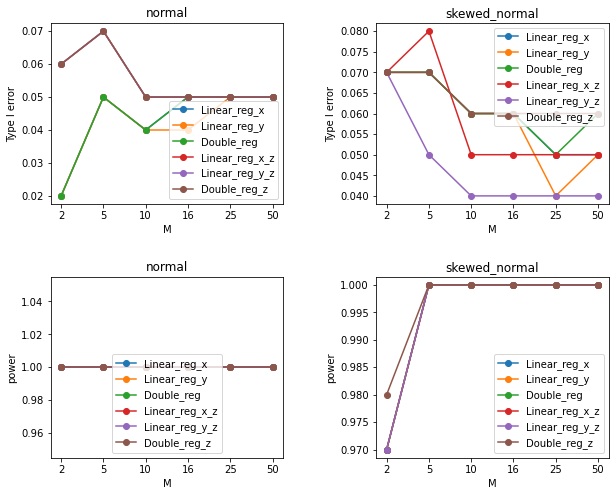

In [110]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_ss_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

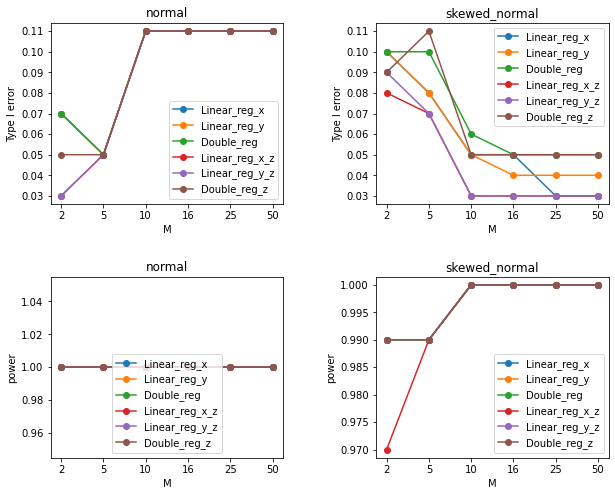

In [111]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_ss_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 2

$f_x(Z)=Z$, $f_y(Z)=Z$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 5)$, $cor \in \{0.1, 0.3, 0.5, 0.7\}$ and permute $Y$.

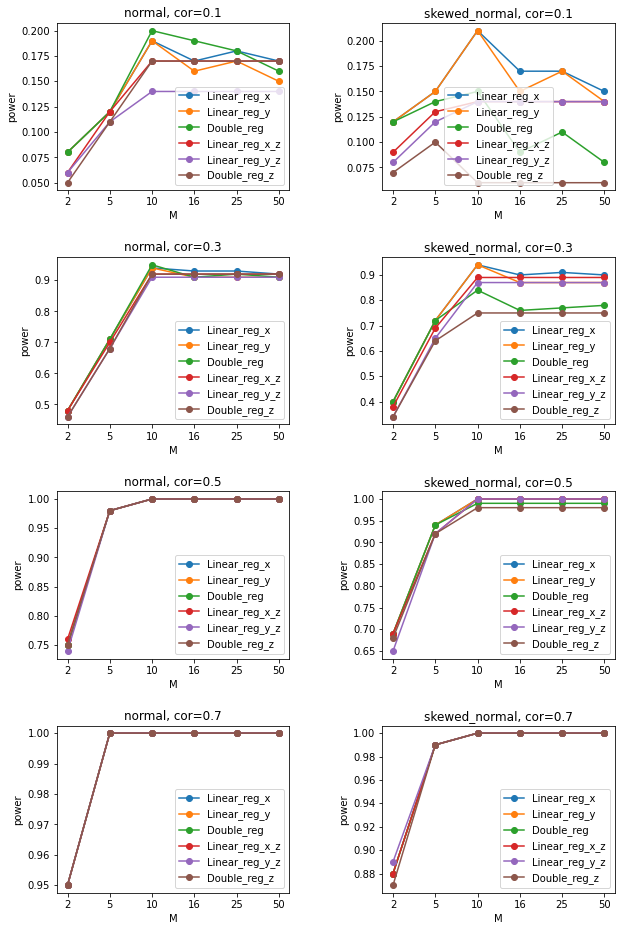

In [136]:
types = ["normal", "skewed_normal"] * 4
hs =  ["h1"] * 8
cors = [0.1, 0.3, 0.5, 0.7]
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(4, 2, t+1)
    c = int(t/2)
    result = pd.read_csv("./results/result_z/result_func00_ss_y_"+hs[t]+"_"+types[t]+"_"+str(c)+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t]+f", cor={cors[c]}")
plt.show()

### experiment 3

$f_x(Z)=\log(Z+1)+2$, $f_y(Z)=7+\sqrt{Z}$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 5)$, $cor \in \{0.1, 0.3, 0.5, 0.7\}$ and permute $Y$.

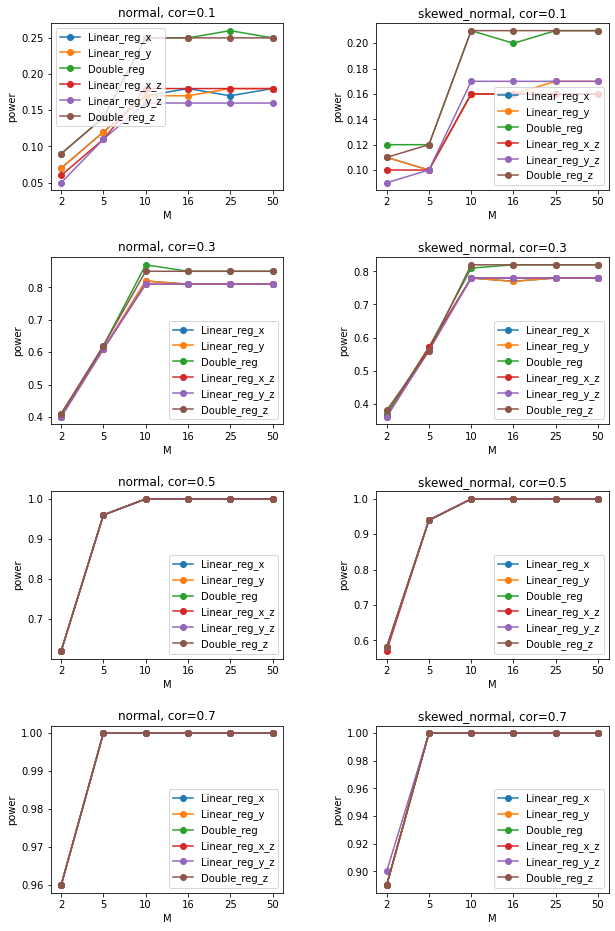

In [139]:
types = ["normal", "skewed_normal"] * 4
hs =  ["h1"] * 8
cors = [0.1, 0.3, 0.5, 0.7]
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(4, 2, t+1)
    c = int(t/2)
    result = pd.read_csv("./results/result_z/result_func47_ss_y_"+hs[t]+"_"+types[t]+"_"+str(c)+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t]+f", cor={cors[c]}")
plt.show()

### experiment 4

$f_x(Z)=Z$, $f_y(Z)=Z$, $\epsilon_x \sim N(\cdot, 0.1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

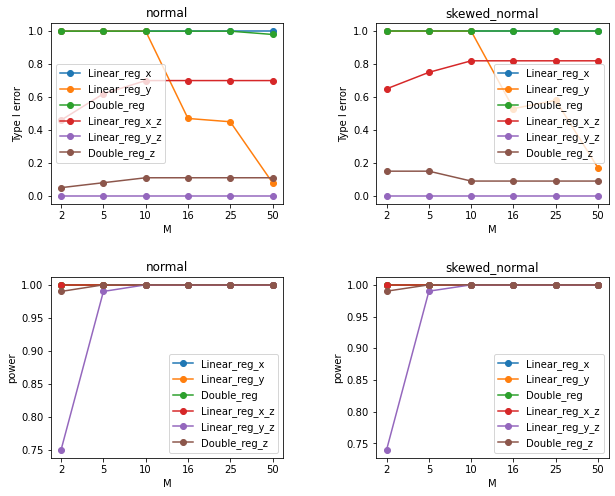

In [93]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_nn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

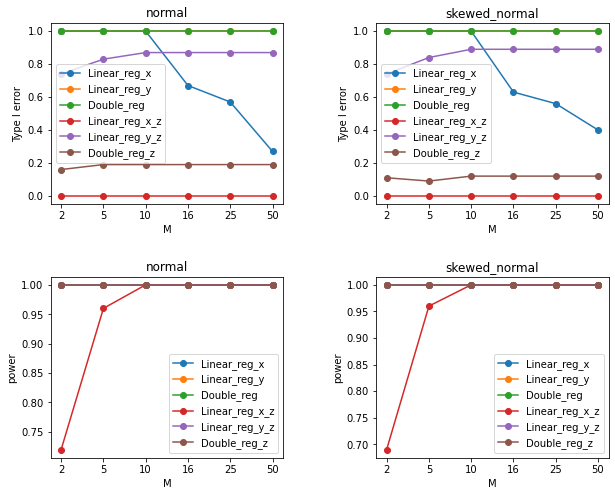

In [94]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_nn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 5

$f_x(Z)=\log(Z+1)+2$, $f_y(Z)=7+Z^{\frac{1}{2}}$, $\epsilon_x \sim N(\cdot, 0.1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

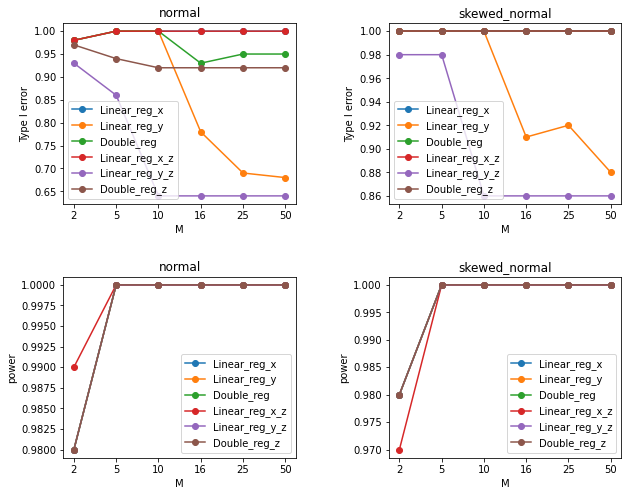

In [100]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func47_nn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

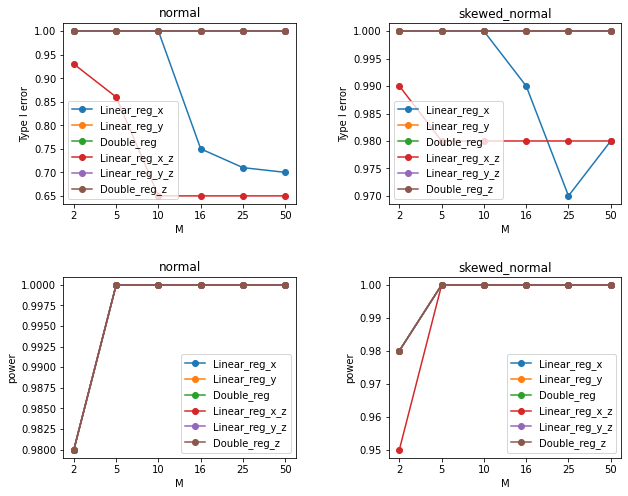

In [109]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func47_nn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 6

$f_x(Z)=Z$, $f_y(Z)=Z$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

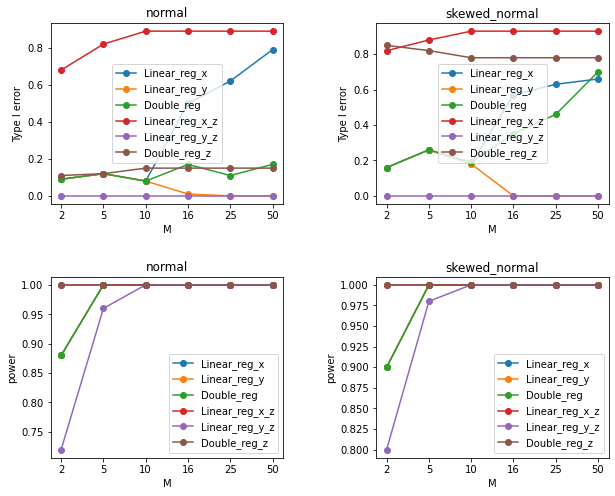

In [122]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_sn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

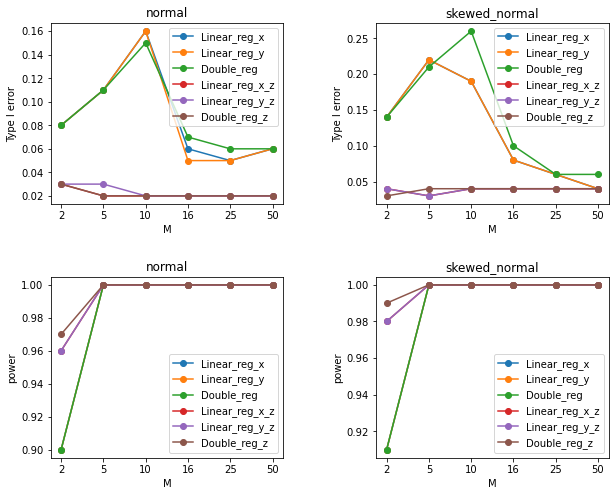

In [123]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func00_sn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 7

$f_x(Z)=\log(Z+1)+2$, $f_y(Z)=7+\sqrt{Z}$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

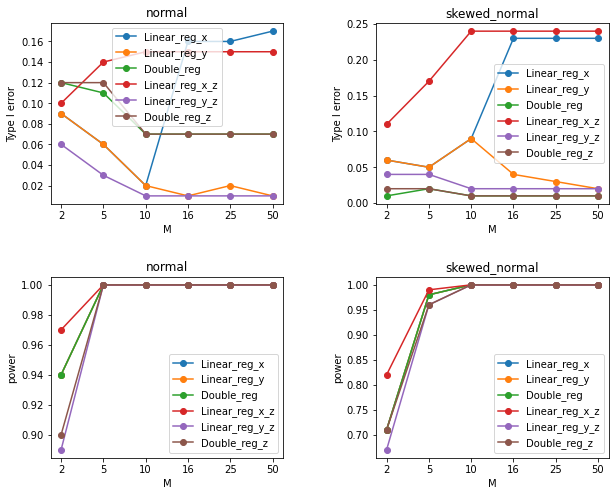

In [126]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func47_sn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

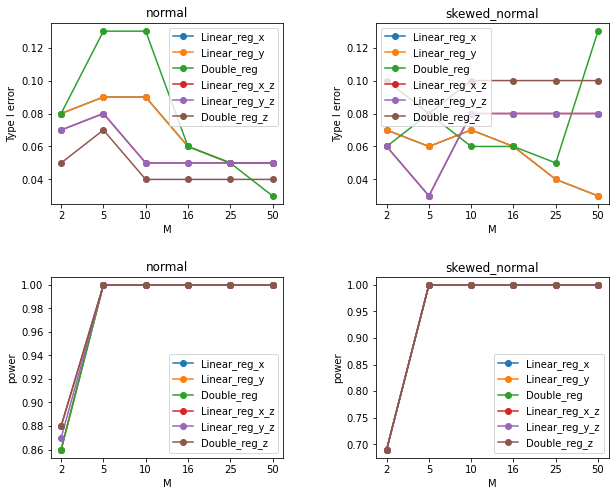

In [127]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func47_sn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 8

$f_x(Z)=5Z$, $f_y(Z)=5Z$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

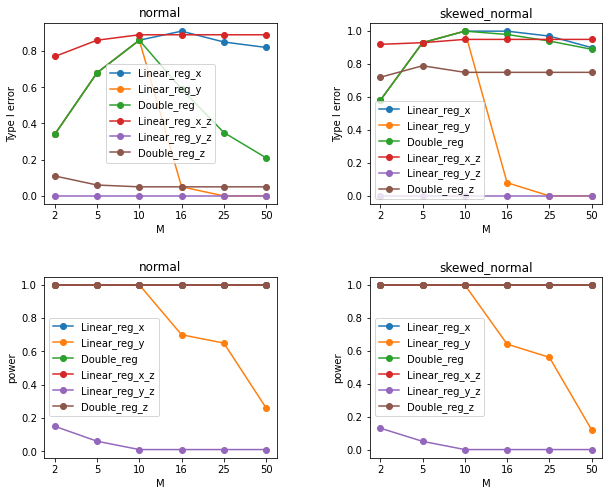

In [142]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func33_sn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

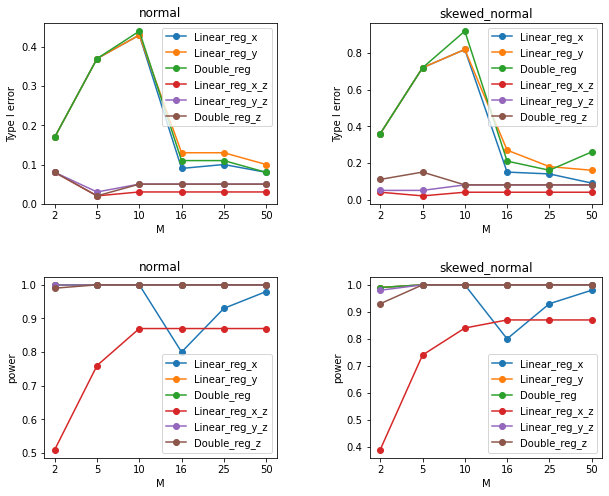

In [143]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2+ ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func33_sn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 9

$f_x(Z)=Z$, $f_y(Z)=7+\sqrt{Z}$, $\epsilon_x \sim N(\cdot, 5)$, $\epsilon_y \sim N(\cdot, 0.1)$.

 - permute $Y$:

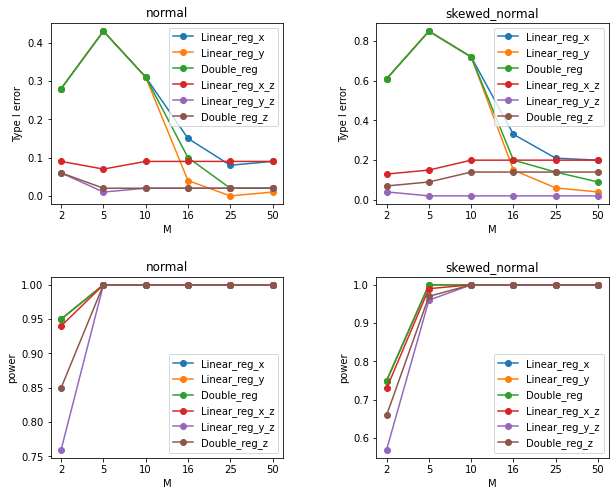

In [145]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2 + ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func07_sn_y_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

 - permute $X$:

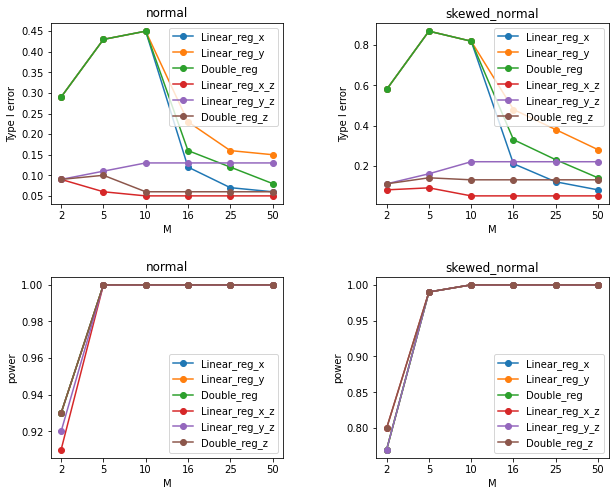

In [144]:
types = ["normal", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 2 + ["h1"] * 2
plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_z/result_func07_sn_x_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()